In [78]:
import cv2
import pytesseract as tess
import numpy as np
import matplotlib.pyplot as plt
import time
from imutils import contours as sortCnt

In [79]:
cap = cv2.VideoCapture("new_cam_1/Export_2020-02-27_182016/0 - 2020-02-27 16-35-00-475.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

154934.0

In [80]:
slab = 100+500+1000+500+100-50-15-10
slab1 = 31080

In [81]:
emptySlab = 100+500+50+50+50+5

In [82]:
cap.set(cv2.CAP_PROP_POS_FRAMES,slab)

True

In [83]:
#%matplotlib notebook

(1080, 1920, 3)


<IPython.core.display.Javascript object>


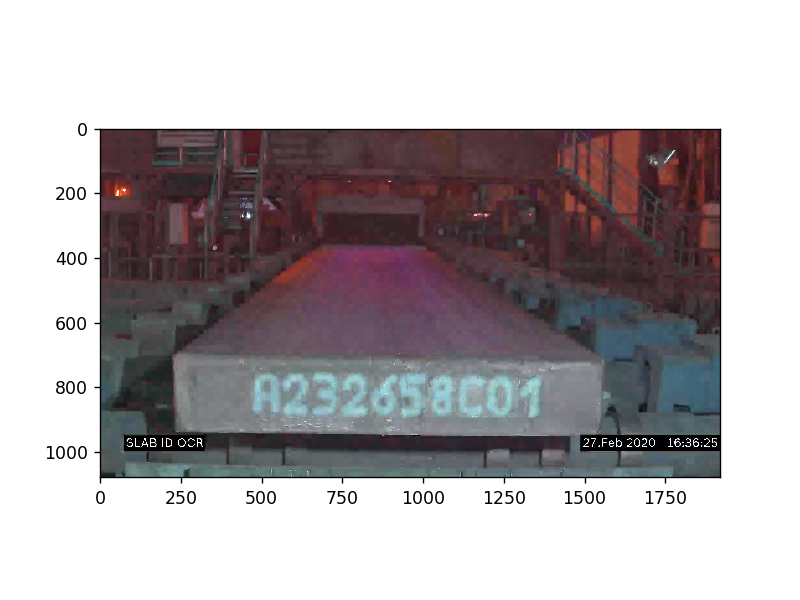

In [103]:
ret, frame = cap.read()
#frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
print(frame.shape)
plt.imshow(frame)

In [85]:
low = 920
up = 750

In [86]:
#%matplotlib notebook

In [87]:
plt.imshow(frame[up-50:low+30])

In [88]:
#cv2.imwrite("new_empty_slab.png",frame[up-50:low+30])

In [89]:
frameGray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
frameGray = frameGray[up-50:low+30]

In [90]:
noSlab = cv2.imread("new_empty_noSlab.jpg",0)
imgSub = cv2.bitwise_xor(frameGray,noSlab)
_,x = cv2.threshold(imgSub,200,255,cv2.THRESH_BINARY )
plt.imshow(x,"gray")

In [91]:
cv2.countNonZero(x[0:100,:])

64024

In [92]:
planeSlab = cv2.imread("new_empty_slab.png",0)
imgSub = cv2.bitwise_xor(frameGray,planeSlab)
_,x = cv2.threshold(imgSub,200,255,cv2.THRESH_BINARY )
plt.imshow(x,"gray")

In [93]:
cv2.countNonZero(x[0:100,:])

40911

In [94]:
#%matplotlib notebook

noSlab = cv2.imread("new_empty_noSlab.jpg",0)
lookForOCR = False
textOCR = None
bBox = [[460,555],
        [560,650],
        [650,740],
        [745,830],
        [830,920],
        [920,1014],
        [1020,1088],
        [1100,1191],
        [1200,1273],
        [1275,1365],]
while True:
    _,frame = cap.read()
    frameGray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    frameGray = frameGray[up-50:low+30]
    imgSub = cv2.bitwise_xor(noSlab,frameGray)
    b,g,r = cv2.split(frame.copy())
    b = r[up-50:low+30]
    _,x = cv2.threshold(b,180,255,cv2.THRESH_BINARY )
    x = cv2.dilate(x,(3,3),iterations = 1)
    _ , contours, hierarchy =   cv2.findContours(x.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    font = cv2.FONT_HERSHEY_SIMPLEX
    frame = cv2.putText(frame,"{}".format(len(contours)),(0,330), font, 2 , (200,255,155), 2 , cv2.LINE_AA)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)[1:10]
    try:
        frame = cv2.putText(frame,"{}mm".format(cv2.contourArea(cnts[1])),(0,380), font, 2 , (200,255,155), 2 , cv2.LINE_AA)
    except IndexError:
        print("nocnt")
    
    
    
    ocr = tess.image_to_string(x[45:200,460:460+100], lang = 'eng' , config="--psm 13 --oem 1 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ")
    print(ocr,"---") 
    if ocr == "A":
        st = 460
        textOCR = ""
        for i in bBox:
            char = tess.image_to_string(x[45:200,i[0]:i[1]], lang = 'eng' , config="--psm 13 --oem 1 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ")
            x = cv2.rectangle(x,(i[0],45),(i[1],200),255,3) 
            print(char)
            st+=100
            textOCR += char
    

    '''if len(contours) == 0:
        lookForOCR = True
        
    if lookForOCR == True:
        ocr = tess.image_to_string(x)
        print(ocr,"<--ocr",len(ocr))
        if len(ocr)== 10:
            frame = cv2.putText(frame,"{}".format(ocr),(0,410), font, 2 , (200,0,155), 2 , cv2.LINE_AA)
            print(ocr)
            lookForOCR = False'''

    if textOCR != None:
        frame = cv2.putText(frame,"OCR = {}".format(textOCR),(0,420), font, 2 , (20,0,155), 5 , cv2.LINE_AA)

        
    
    cv2.imshow("s",frame)
    cv2.imshow("x",x)
    cv2.imshow("x[11]",x[45:200,460:560])
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()
cap.release()

In [95]:
cnts = sorted(contours, key = cv2.contourArea,reverse= True)[1:10]
print(cv2.contourArea(cnts[1]))

7254.5


In [96]:
plt.imshow(x)

In [97]:
dst = frame

In [98]:
img = cv2.cvtColor(dst.copy(),cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img.copy()) 
hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
hh,s,v = cv2.split(hsv)
yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
y,u,vb = cv2.split(yuv)


hls = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HLS_FULL)
h,l,ss = cv2.split(hls)


In [99]:
plt.imshow(r
          )

In [100]:
b,g,r = cv2.split(frame.copy())
b = r[up-50:low+30]
_,x = cv2.threshold(b,180,255,cv2.THRESH_BINARY )
x = cv2.dilate(x,(3,3),iterations = 1)
plt.imshow(x)

In [101]:
%matplotlib notebook

# Tess

In [102]:
print(tess.image_to_string(x))

A232658C04


In [52]:
(len(tess.image_to_string(x)))

0

<IPython.core.display.Javascript object>


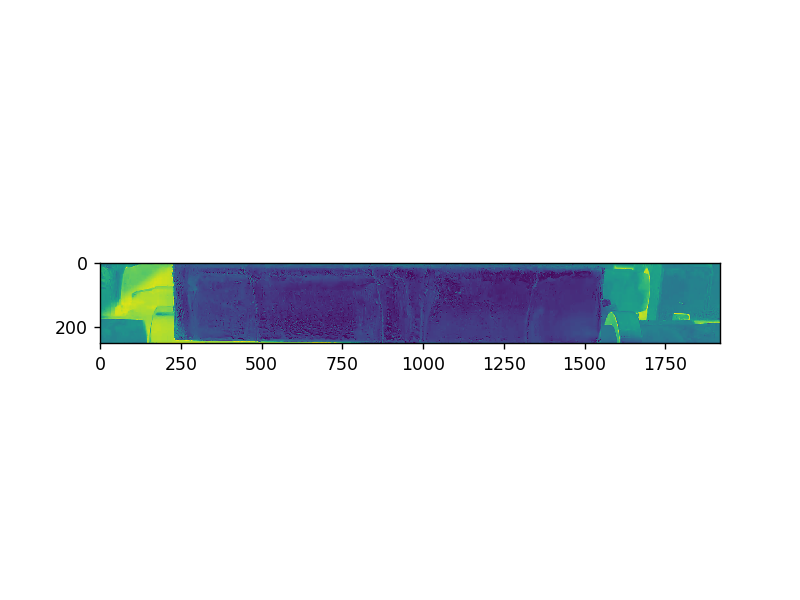

In [53]:
plt.imshow(x[45:200,460:560+3])

In [54]:
(b.shape[0]*b.shape[1]) - len(x.nonzero()[0])

409190

In [55]:
blank = np.zeros(b.shape)
_ , contours, hierarchy =   cv2.findContours(x.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea,reverse= True)[0:10]
print(len(contours))

644


In [56]:
blank = cv2.drawContours(blank,cnts,-1,225,3)

In [ ]:
plt.imshow(blank)

In [57]:
#cv2.imwrite("new_empty_slab.png",vb)

In [76]:
blankSlab = cv2.imread("new_empty_slab.png",0)

#blankSlab = cv2.resize(blankSlab,(blankSlab.shape[1]*2,blankSlab.shape[0]*2), cv2.INTER_AREA)
#dst = cv2.resize(dst,(dst.shape[1]*2,dst.shape[0]*2), cv2.INTER_AREA)

dstGray = cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)

yuvb_ = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
y,u,vb_ = cv2.split(yuv)

#diff = cv2.bitwise_not( dstGray, blankSlab)
diff = cv2.bitwise_not( blankSlab, dstGray)
diff = np.array(diff,np.uint8)
print(tess.image_to_string(diff))
plt.imshow(diff)

In [ ]:
break

In [ ]:
%matplotlib notebook

In [ ]:
plt.imshow(diff)

In [ ]:
#%matplotlib notebook

In [ ]:
gray = cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)
_,x = cv2.threshold(gray,150,255,cv2.THRESH_BINARY)
#adThresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,191*3,25)
erosion = cv2.erode(x,(3,3),iterations = 3)
plt.imshow(erosion)

In [ ]:
blank = np.zeros(erosion.shape)
_ , contours, hierarchy =   cv2.findContours(erosion.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea,reverse= True)
# cntr Order
#print(len(cnts))

'''epsilon = 0.0001*cv2.arcLength(cnts[0],True)
approx = cv2.approxPolyDP(cnts[0],epsilon,True)'''
for i in range(len(cnts)):
    print(cv2.contourArea(cnts[i]))
#
cnts, bBox = sortCnt.sort_contours(cnts[1:11])
#print(cnts)
print(cv2.contourArea(cnts[-1]),"___")

In [ ]:
ordr = 1
dstCnt = cv2.drawContours(blank.copy(),cnts,ordr,(255),2)
plt.imshow(dstCnt)

In [ ]:
bBox

In [ ]:
#np.save("imgPoints.npy",bBox)

In [ ]:
c = np.load("ocrPoints.npy")
c

In [ ]:
# --psm 13 it should works, because it will consider it as a raw text line, without searching for pages and paragraphs.
for i in c:
    #x = erosion[i[1]-11:i[1]+120,i[0]-5:i[0]+44] # GOOD
    
    #x = erosion[i[1]-15:i[1]+125,i[0]-10:i[0]+50] # with imgPoints.npy
    x = erosion[i[1]:i[1]+i[3],i[0]:i[0]+i[2]]
    ocr = tess.image_to_string(x, lang = 'eng' , config="--psm 13 --oem 1 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ",)
    if ocr == "":
        ocr = "_"
    print(ocr)
    cv2.imshow("sbjhkj",x)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
print(tess.image_to_string(erosion, config="--psm 13",timeout=500))

In [ ]:
break

In [ ]:
c[0][0] = 100
c

In [ ]:
c[2:4]

In [ ]:
i = c[1]

In [ ]:
i = [540 ,17,60,120]

In [ ]:
438+50

In [ ]:
dst = cv2.rectangle(dst.copy(),(i[0],i[1]),(i[0]+i[2],i[1]+i[3]),(0,0,255),1)
text = tess.image_to_string(x, lang = 'eng' , config="--psm 13 --oem 1 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ")
print(text)
cv2.imshow("sbjhkj",dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
#plt.imshow(dst)

In [ ]:
ocrPoints = [[100,17,80,120],[153,13,58,120 + 7],
             [202,17,57,120],[253,13,55,120 + 7],
             [297,17,55,120],[350,13,55,120 + 7],
             [390,17,57,120],[441,13,50,120 + 7],
             [490,17,49,120],[537,13,60,120 + 7]]

In [ ]:
#np.save("ocrPoints.npy",ocrPoints)

In [ ]:
print(tess.image_to_string(erosion, config="--psm 13",timeout=500))

In [ ]:
len("ADBARRSCO1")

In [ ]:
while(True):
    ret, img = cap.read()
    
    pts1 = np.float32([[115,417],[509,340],[115,490],[509,400]])
    pts2 = np.float32([[0,0],[352,0],[0,81],[352,81]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    #dst = cv2.warpPerspective(allFrames[-450],M,(352,81))
    dst = cv2.warpPerspective(img,M,(402,81))
    dst_2 = cv2.resize(dst,(dst.shape[1]*2,dst.shape[0]*2), cv2.INTER_AREA)
    
    cv2.imshow('img ',dst)
    cv2.imshow("full",img)
    cv2.imshow("2x",dst_2)
    time.sleep(0.09)
   
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()